<a href="https://colab.research.google.com/github/Karan8989-ux/NLP/blob/main/Disaster_Tweets_Prediction_Project_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
df_train=pd.read_csv('/content/train.csv(Disaster Tweets).csv')
df_test=pd.read_csv('/content/train.csv(Disaster Tweets).csv')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.isna().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
!pip install nltk
import nltk

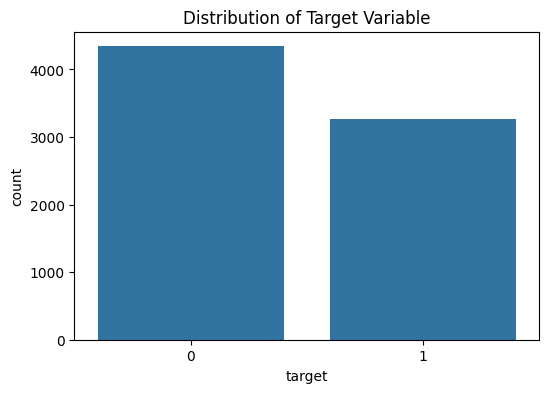

In [ ]:
# Analyze the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
# Explore the 'keyword' column
print("Top 20 keywords:")
display(df_train['keyword'].value_counts().head(20))

# Explore the 'location' column
print("\nTop 20 locations:")
display(df_train['location'].value_counts().head(20))

Top 20 keywords:


,count
keyword,
fatalities,45
deluge,42
armageddon,42
damage,41
body%20bags,41
harm,41
sinking,41
evacuate,40
outbreak,40



Top 20 locations:


,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24


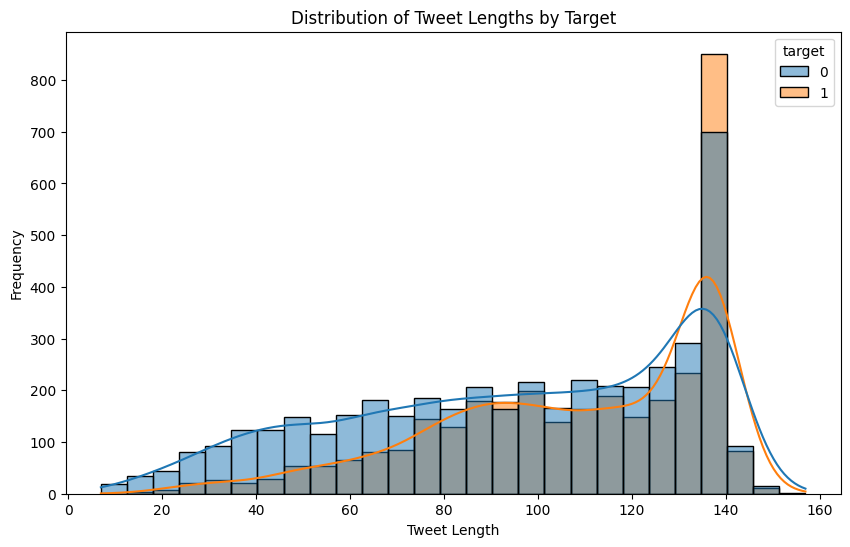

In [ ]:
# Visualize tweet lengths
df_train['text_length'] = df_train['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='text_length', hue='target', kde=True)
plt.title('Distribution of Tweet Lengths by Target')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

display(df_train[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds Reason May ALLAH Forgive us
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,All residents asked shelter place notified off...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive evacuation orders California
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent photo Ruby smoke pours school


In [ ]:
!pip install transformers
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def encode_text(tokenizer, texts, max_length=140):
    return tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

train_encodings = encode_text(tokenizer, df_train['cleaned_text'])
test_encodings = encode_text(tokenizer, df_test['cleaned_text'])

display(train_encodings)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


{'input_ids': <tf.Tensor: shape=(7613, 140), dtype=int32, numpy=
array([[  101,  2256, 15616, ...,     0,     0,     0],
       [  101,  3224,  2543, ...,     0,     0,     0],
       [  101,  2035,  3901, ...,     0,     0,     0],
       ...,
       [  101, 23290,  2683, ...,     0,     0,     0],
       [  101,  2610, 11538, ...,     0,     0,     0],
       [  101,  1996,  6745, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(7613, 140), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2, use_safetensors=False)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

tf_model.h5:   0%|          | 0.00/363M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    x={'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask']},
    y=df_train['target'],
    epochs=3,  # You can adjust the number of epochs
    batch_size=16, # You can adjust the batch size
    validation_split=0.2 # Using 20% of the training data for validation
)

Epoch 1/3
381/381 [==============================] - 163s 276ms/step - loss: 0.4617 - accuracy: 0.7995 - val_loss: 0.4015 - val_accuracy: 0.8227
Epoch 2/3
381/381 [==============================] - 95s 249ms/step - loss: 0.3379 - accuracy: 0.8632 - val_loss: 0.4268 - val_accuracy: 0.8142
Epoch 3/3
381/381 [==============================] - 95s 248ms/step - loss: 0.2185 - accuracy: 0.9200 - val_loss: 0.4713 - val_accuracy: 0.8089


In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(
    x={'input_ids': train_encodings['input_ids'][int(len(df_train)*0.8):], 'attention_mask': train_encodings['attention_mask'][int(len(df_train)*0.8):]},
    y=df_train['target'][int(len(df_train)*0.8):]
)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

48/48 [==============================] - 7s 147ms/step - loss: 0.4713 - accuracy: 0.8089
Validation Loss: 0.4713
Validation Accuracy: 0.8089


In [ ]:
# Make predictions on the test data
predictions = model.predict(
    x={'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']}
)

# The predictions are raw logits, so we need to apply a softmax to get probabilities
# and then get the predicted class (0 or 1)
predicted_classes = tf.argmax(predictions.logits, axis=1).numpy()

238/238 [==============================] - 38s 150ms/step


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming df_test has a 'target' column with the true labels
test_accuracy = accuracy_score(df_test['target'], predicted_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9354


In [ ]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'id': df_test['id'], 'target': predicted_classes})

# Display the first few rows of the submission DataFrame
display(submission_df.head())

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

,id,target
0,1,1
1,4,1
2,5,1
3,6,1
4,7,1


Submission file created successfully!
